In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mdtraj as md
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['font.size'] = 10
import re
import MDAnalysis as mda
#from MDAnalysis.tests.datafiles import PSF,DCD  # test trajectory
import numpy.linalg
import MDAnalysis.analysis.msd as msd
import MDAnalysis.analysis.rdf as rdf
import MDAnalysis.transformations as tf

/ext3/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df1= pd.read_csv('./Inputs/water_aimd_1ps_every0.5fs_-1.ener',sep="\s+")
df1

,Step,Nr.,Time[fs],Kin.[a.u.],Temp[K],Pot.[a.u.],Cons,Qty[a.u.],UsedTime[s]
0,0,0.0,0.273613,300.000000,-1102.629449,-1102.355836,0.000000,NaN,NaN
1,1,0.5,0.279634,306.601635,-1102.634728,-1102.356033,32.242220,NaN,NaN
2,2,1.0,0.278176,305.003474,-1102.643688,-1102.356285,4.777164,NaN,NaN
3,3,1.5,0.280393,307.434493,-1102.653081,-1102.356547,4.772428,NaN,NaN
4,4,2.0,0.282889,310.171274,-1102.655863,-1102.356593,4.757358,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1223,1223,611.5,0.266217,291.890933,-1102.677244,-1102.355561,5.196043,NaN,NaN
1224,1224,612.0,0.283525,310.868101,-1102.681569,-1102.355690,4.808684,NaN,NaN
1225,1225,612.5,0.283965,311.351022,-1102.685290,-1102.355819,4.983751,NaN,NaN
1226,1226,613.0,0.278338,305.180357,-1102.684659,-1102.355830,5.011152,NaN,NaN


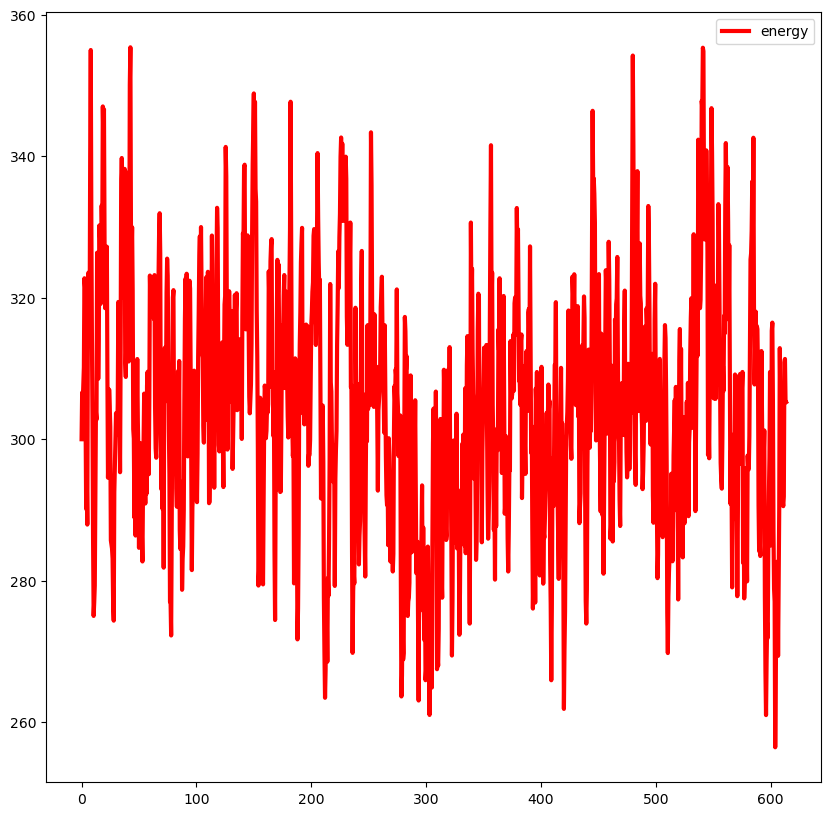

<Figure size 1000x1000 with 0 Axes>

In [28]:
plt.plot(df1["Nr."],df1["Kin.[a.u.]"], 'r',linewidth=3,linestyle='-',label='energy')
plt.legend()
plt.show()
plt.savefig("./water_energy_vs_time.png")

In [4]:
top_path = "./Inputs/water.xyz"
traj_path = "./Inputs/water_aimd_1ps_every0.5fs_-pos-1.xyz"
u = mda.Universe(traj_path)

In [5]:
dim = [12.42,12.42,12.42,90,90,90]
transform = tf.boxdimensions.set_dimensions(dim)
u.trajectory.add_transformations(transform)

In [21]:
sel1 = u.select_atoms("name H* ")
sel2 = u.select_atoms("name O* ")
rdf1 = rdf.InterRDF(sel1, sel1, nbins=100, range=(0.1, 13))#range more than box
rdf2 = rdf.InterRDF(sel2, sel2, nbins=100, range=(0.1, 13))
rdf3 = rdf.InterRDF(sel1, sel2, nbins=100, range=(0.1, 13))
rdf1.run()
rdf2.run()
rdf3.run()

In [22]:
print(rdf1.rdf)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.73942019e-03 7.07690194e-01 2.56801823e+00
 4.49305773e-01 9.09390942e-02 3.74900038e-01 8.82201361e-01
 1.34064519e+00 1.47120850e+00 1.31753322e+00 9.79809494e-01
 7.50078191e-01 6.95293782e-01 6.98511696e-01 7.72412275e-01
 8.55625162e-01 9.41496102e-01 1.05797727e+00 1.17053128e+00
 1.23441651e+00 1.20426952e+00 1.13351907e+00 1.08931730e+00
 1.05659615e+00 1.04625620e+00 1.02717044e+00 1.00339300e+00
 9.64792054e-01 9.36994418e-01 9.22635238e-01 9.22708330e-01
 9.22988352e-01 9.37413526e-01 9.66566399e-01 1.00046355e+00
 1.01854686e+00 1.03280458e+00 1.01766257e+00 1.00181866e+00
 9.48463255e-01 8.76785315e-01 8.21729444e-01 7.63874895e-01
 7.07826518e-01 6.54915879e-01 6.04298607e-01 5.67192688e-01
 5.31447777e-01 4.89614813e-01 4.48291249e-01 4.03924341e-01
 3.66607924e-01 3.25082232e-01 2.77681463e-01 2.40753640e-01
 2.03878179e-01 1.709357

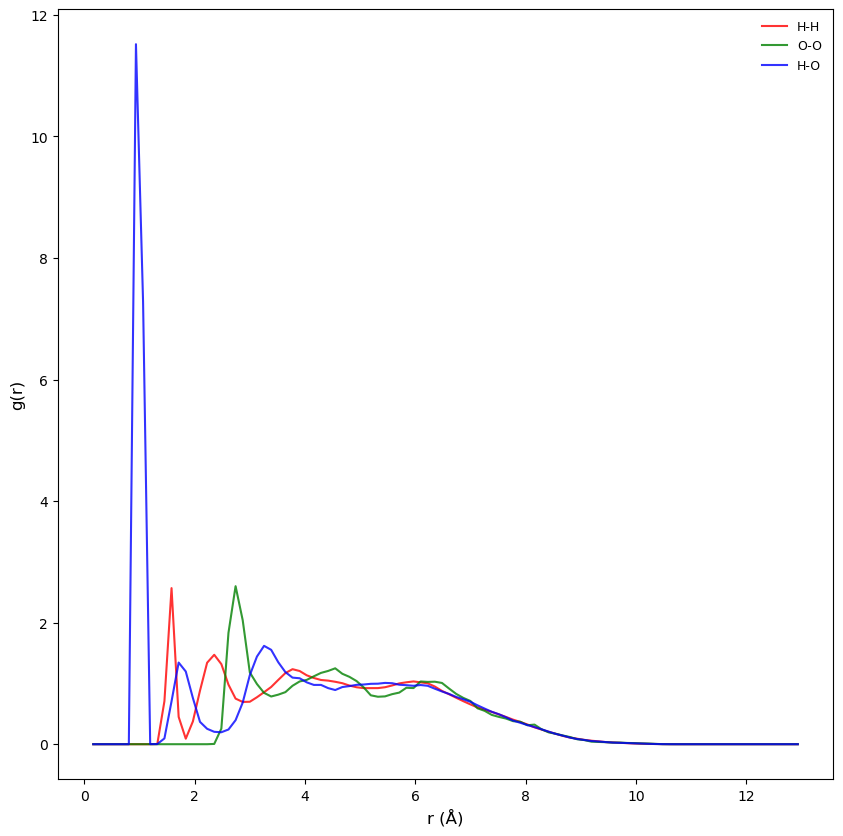

In [24]:
# figure 1 - RDFs
fig = plt.figure(1)

# set 11 line width, range from 2 to 1
linewidths = np.linspace(2, 1, 11)
# plot RDFs
plt.plot(rdf1.bins, rdf1.rdf, 'r', label='H-H', alpha=0.8)
plt.plot(rdf2.bins, rdf2.rdf, 'g', label='O-O', alpha=0.8) 
plt.plot(rdf3.bins, rdf3.rdf, 'b', label='H-O', alpha=0.8)
plt.xlabel('r (Å)', fontsize=12)
plt.ylabel('g(r)', fontsize=12)
plt.legend(loc='upper right', fontsize=9, frameon=False)

# save figure as pdf in ../Figures
fname = './fig1.water_RDF_H_O.png'
plt.savefig(fname, format='png', dpi=300, bbox_inches='tight')

In [5]:
df2= pd.read_csv('./Proton/proton_aimd_1ns_every0.5fs_-1.ener',sep="\s+")
df2

,Step,Nr.,Time[fs],Kin.[a.u.],Temp[K],Pot.[a.u.],Cons,Qty[a.u.],UsedTime[s]
0,0,0.0,0.270763,300.000000,-1085.741167,-1085.470404,0.000000,NaN,NaN
1,1,0.5,0.267804,296.721805,-1085.740461,-1085.470436,560.018703,NaN,NaN
2,2,1.0,0.264112,292.630813,-1085.745401,-1085.470811,199.385152,NaN,NaN
3,3,1.5,0.262770,291.143717,-1085.754875,-1085.471112,279.326505,NaN,NaN
4,4,2.0,0.264556,293.123147,-1085.760264,-1085.471214,278.766686,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1996,1996,998.0,0.277320,307.265735,-1086.069397,-1085.474123,7.413258,NaN,NaN
1997,1997,998.5,0.276232,306.059568,-1086.066116,-1085.474057,7.565025,NaN,NaN
1998,1998,999.0,0.254187,281.634265,-1086.064689,-1085.474072,7.359059,NaN,NaN
1999,1999,999.5,0.248250,275.056223,-1086.064228,-1085.474131,7.583238,NaN,NaN


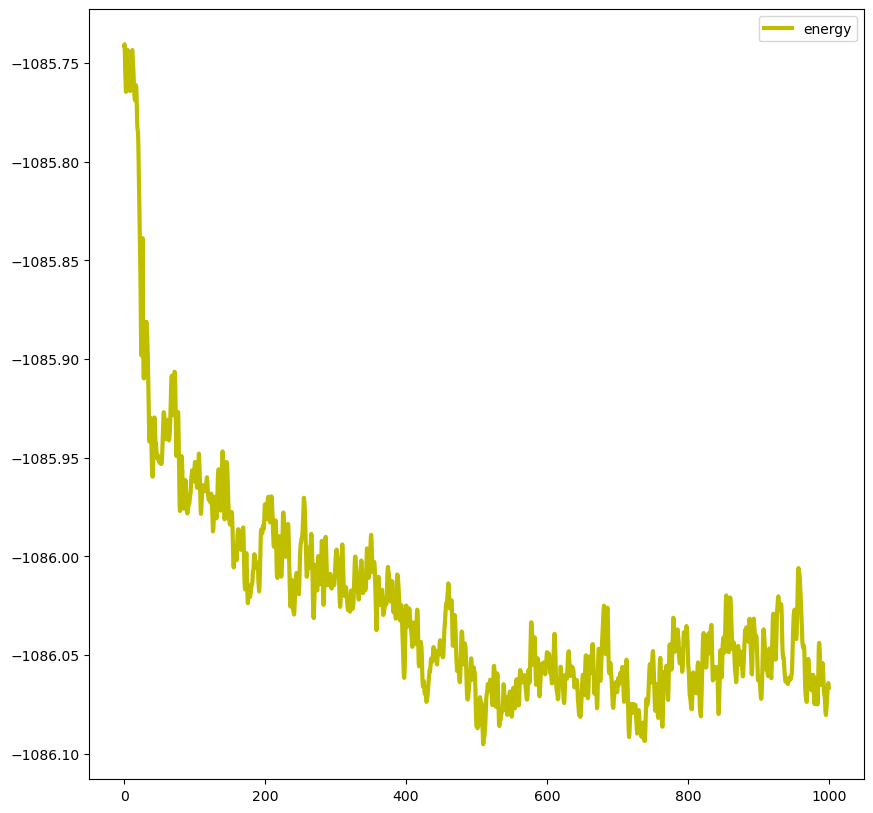

<Figure size 1000x1000 with 0 Axes>

In [6]:
plt.plot(df2["Nr."],df2["Temp[K]"], 'y',linewidth=3,linestyle='-',label='energy')
plt.legend()
plt.show()
plt.savefig("./proton_energy_vs_time.png")

In [7]:
traj_path1 = "./Proton/proton_aimd_1ns_every0.5fs_-pos-1.xyz"
u = mda.Universe(traj_path1)
dim = [12.42,12.42,12.42,90,90,90]
transform = tf.boxdimensions.set_dimensions(dim)
u.trajectory.add_transformations(transform)

In [10]:
sel1 = u.select_atoms("name H* ")
sel2 = u.select_atoms("name O* ")
rdf4 = rdf.InterRDF(sel1, sel1, nbins=100, range=(0.1, 13))#range more than box
rdf5 = rdf.InterRDF(sel2, sel2, nbins=100, range=(0.1, 13))
rdf6 = rdf.InterRDF(sel1, sel2, nbins=100, range=(0.1, 13))
rdf4.run()
rdf5.run()
rdf6.run()

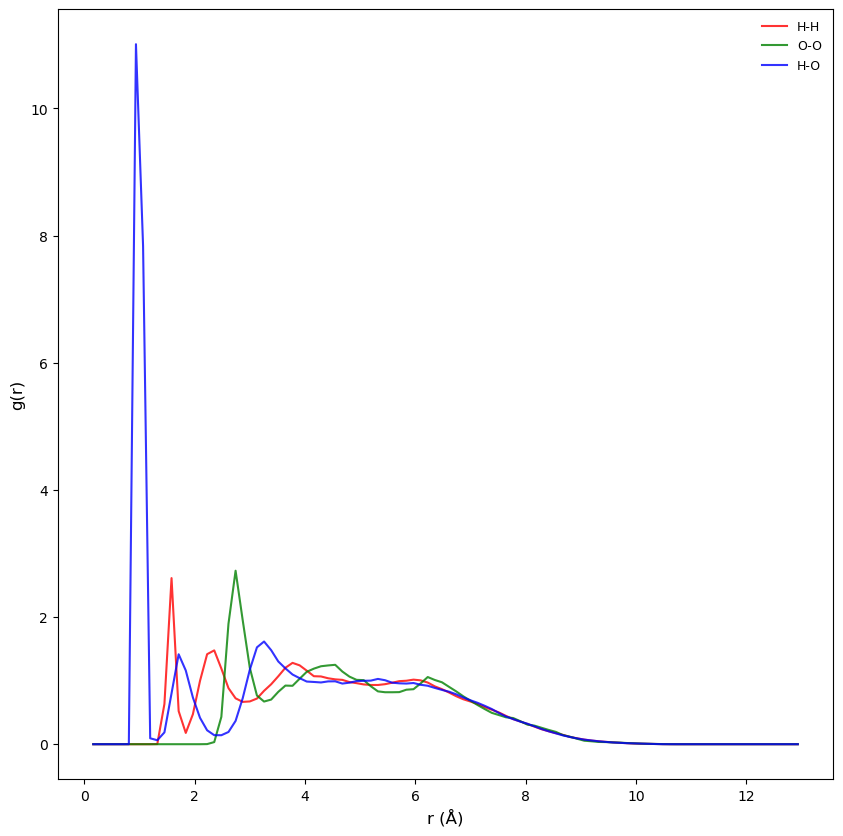

In [11]:
# figure 1 - RDFs
fig = plt.figure(1)

# set 11 line width, range from 2 to 1
linewidths = np.linspace(2, 1, 11)
# plot RDFs
plt.plot(rdf4.bins, rdf4.rdf, 'r', label='H-H', alpha=0.8)
plt.plot(rdf5.bins, rdf5.rdf, 'g', label='O-O', alpha=0.8) 
plt.plot(rdf6.bins, rdf6.rdf, 'b', label='H-O', alpha=0.8)
plt.xlabel('r (Å)', fontsize=12)
plt.ylabel('g(r)', fontsize=12)
plt.legend(loc='upper right', fontsize=9, frameon=False)

# save figure as pdf in ../Figures
fname = './fig2.proton_RDF_H_O.png'
plt.savefig(fname, format='png', dpi=300, bbox_inches='tight')